<a href="https://colab.research.google.com/github/pragathiyelagam05/AIML-batch16/blob/main/chess_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #data visualization
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
#import csv
chess = pd.read_csv('../input/lichess-chess-games-statistics/Chess games stats.csv')

In [ ]:
print(chess.shape)

(18637, 14)


In [ ]:
chess.describe()

,Unnamed: 0,White Rating,Black Rating,Opening Ply,White Centi-pawn Loss,White's Number of Inaccuracies,White's Number of Mistakes,White's Number of Blunders,Black Centi-pawn Loss,Black's Number of Inaccuracies,Black's Number of Mistakes,Black's Number of Blunders
count,18637.000000,18637.000000,18637.000000,18637.000000,18637.000000,18637.000000,18637.000000,18637.000000,18637.000000,18637.000000,18637.000000,18637.000000
mean,9318.000000,1774.528519,1776.729678,5.319043,58.814294,3.258947,1.325643,2.115738,60.778451,3.283254,1.332242,2.118206
std,5380.182819,314.840181,317.424527,3.058254,36.622111,2.404746,1.390271,2.078614,38.316602,2.420974,1.383967,2.094702
min,0.000000,784.000000,780.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4659.000000,1551.000000,1552.000000,3.000000,33.000000,1.000000,0.000000,1.000000,33.000000,1.000000,0.000000,1.000000
50%,9318.000000,1782.000000,1781.000000,5.000000,53.000000,3.000000,1.000000,2.000000,55.000000,3.000000,1.000000,2.000000
75%,13977.000000,1991.000000,1996.000000,7.000000,77.000000,5.000000,2.000000,3.000000,80.000000,5.000000,2.000000,3.000000
max,18636.000000,2997.000000,2995.000000,28.000000,517.000000,19.000000,12.000000,18.000000,550.000000,22.000000,12.000000,22.000000


In [ ]:
chess.head()

,Unnamed: 0,Game ID,White Rating,Black Rating,Opening ECO,Opening Ply,White Centi-pawn Loss,White's Number of Inaccuracies,White's Number of Mistakes,White's Number of Blunders,Black Centi-pawn Loss,Black's Number of Inaccuracies,Black's Number of Mistakes,Black's Number of Blunders
0,0,J7Xvjkte,1441,1559,C20,4,32,2,2,0,87,2,4,1
1,1,SSzpi7W1,1258,1567,C46,6,43,0,0,1,6,0,0,0
2,2,NHpcYm3r,1697,1712,C68,7,11,1,0,0,42,1,0,2
3,3,Nrzmgzmn,1978,1868,D31,5,21,3,0,0,53,6,0,1
4,4,xMuFsnC6,2073,1816,A01,2,35,3,2,0,50,6,3,0


In [ ]:
chess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18637 entries, 0 to 18636
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      18637 non-null  int64 
 1   Game ID                         18637 non-null  object
 2   White Rating                    18637 non-null  int64 
 3   Black Rating                    18637 non-null  int64 
 4   Opening ECO                     18637 non-null  object
 5   Opening Ply                     18637 non-null  int64 
 6   White Centi-pawn Loss           18637 non-null  int64 
 7   White's Number of Inaccuracies  18637 non-null  int64 
 8   White's Number of Mistakes      18637 non-null  int64 
 9   White's Number of Blunders      18637 non-null  int64 
 10  Black Centi-pawn Loss           18637 non-null  int64 
 11  Black's Number of Inaccuracies  18637 non-null  int64 
 12  Black's Number of Mistakes      18637 non-null

In [ ]:
#check for null values
chess.isna().sum()

Unnamed: 0                        0
Game ID                           0
White Rating                      0
Black Rating                      0
Opening ECO                       0
Opening Ply                       0
White Centi-pawn Loss             0
White's Number of Inaccuracies    0
White's Number of Mistakes        0
White's Number of Blunders        0
Black Centi-pawn Loss             0
Black's Number of Inaccuracies    0
Black's Number of Mistakes        0
Black's Number of Blunders        0
dtype: int64

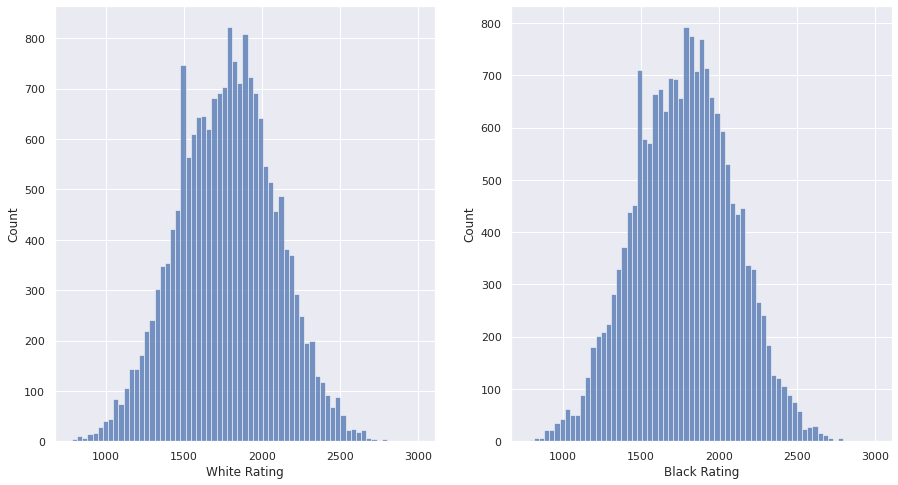

In [ ]:
#plot distribution of white and black ratings
#spike at 1500 is because all players start at 1500 rating

sns.set(rc = {'figure.figsize':(15,8)})
fig, ax=plt.subplots(1,2)
sns.histplot(chess, x="White Rating", ax=ax[0])
sns.histplot(chess, x="Black Rating", ax=ax[1])
fig.show()

#plt.axvline(chess['White Rating'].mean(), color='r', linestyle='--', label="Mean")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Opening ECO', ylabel='count'>

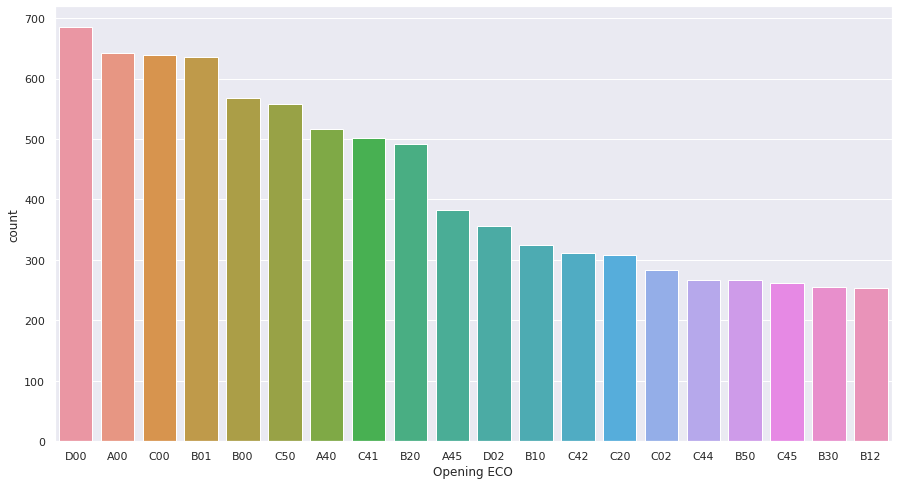

In [ ]:
#Trying to graph most common openings
count = Counter(chess['Opening ECO'])

chess['Opening ECO'].value_counts().iloc[:20]
#common_openings = chess['Opening ECO']
#count.most_common()[:20].index
#chess.value_counts('Opening ECO').iloc[:10]

#Ordered top 20 opening by ECO code
sns.countplot(chess['Opening ECO'], order=chess['Opening ECO'].value_counts().iloc[:20].index)

In [ ]:
#6.0 pawns = 600 centipawns
#Average Centipawn loss = the average loss incurred by each bad move
#Lower us better
#20 is pretty good, 70 is pretty bad, usually between 0-100

avg_white_cl = chess['White Centi-pawn Loss'].mean()
avg_black_cl = chess['Black Centi-pawn Loss'].mean()

print(avg_white_cl)
print(avg_black_cl)

58.81429414605355
60.77845146751086


In [ ]:
#White slightly lower centipawn loss for whole general population, lets see for separate groups
#0-1500,1500-2000,2000+

low_rating_white = chess[chess['White Rating'] <= 1500]
mid_rating_white = chess[(chess['White Rating'] > 1500) & (chess['White Rating'] <= 2000)]
high_rating_white = chess[chess['White Rating'] > 2000]

avg_white_low = low_rating_white['White Centi-pawn Loss'].mean()
avg_white_mid = mid_rating_white['White Centi-pawn Loss'].mean()
avg_white_high = high_rating_white['White Centi-pawn Loss'].mean()

print(avg_white_low)
print(avg_white_mid)
print(avg_white_high)

75.33236994219654
58.62548225308642
45.16647994622451


In [ ]:
low_rating_black = chess[chess['Black Rating'] <= 1500]
mid_rating_black = chess[(chess['Black Rating'] > 1500) & (chess['Black Rating'] <= 2000)]
high_rating_black = chess[chess['Black Rating'] > 2000]

avg_black_low = low_rating_black['Black Centi-pawn Loss'].mean()
avg_black_mid = mid_rating_black['Black Centi-pawn Loss'].mean()
avg_black_high = high_rating_black['Black Centi-pawn Loss'].mean()

print(avg_black_low)
print(avg_black_mid)
print(avg_black_high)

78.03728186144897
60.85455783636541
46.34331293706294


In [ ]:
centi_dict = {'Centipawn Loss': [avg_white_low, avg_white_mid, avg_white_high, avg_black_low, avg_black_mid, avg_black_high],
              'Color': ['White', 'White','White', 'Black', 'Black', 'Black',],
              'Tier': ['Low', 'Mid', 'High', 'Low', 'Mid', 'High']}
#df = pd.DataFrame(data=d)
centipawn_diff = pd.DataFrame(data=centi_dict)
centipawn_diff

,Centipawn Loss,Color,Tier
0,75.332370,White,Low
1,58.625482,White,Mid
2,45.166480,White,High
3,78.037282,Black,Low
4,60.854558,Black,Mid
5,46.343313,Black,High


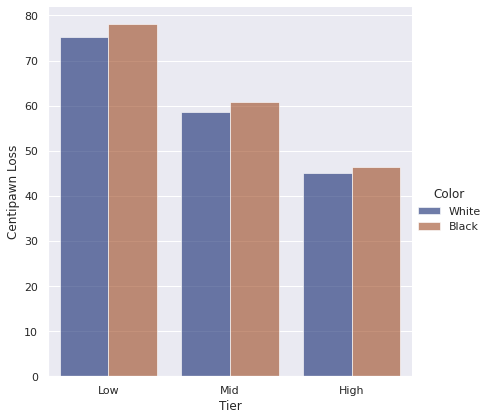

In [ ]:
g = sns.catplot(
    data=centipawn_diff, kind="bar",
    x="Tier", y="Centipawn Loss", hue="Color",
    palette="dark", alpha=.6, height=6
)

In [ ]:
#Centpawn loss for inaccuracy, mistake, blunder
#Inaccuracy = not horrible moves but there are better moves that help more
#Mistake = moves that give advantage to opponent but not as drastic as blunder
#Blunder = unoforgivable errors that can be game-ending is exploited

avg_white_cl
avg_black_cl

avg_white_inaccuracy = chess['White\'s Number of Inaccuracies'].mean()
avg_white_mistake = chess['White\'s Number of Mistakes'].mean()
avg_white_blunder = chess['White\'s Number of Blunders'].mean()

avg_black_inaccuracy = chess['Black\'s Number of Inaccuracies'].mean()
avg_black_mistake = chess['Black\'s Number of Mistakes'].mean()
avg_black_blunder = chess['Black\'s Number of Blunders'].mean()

print(avg_white_inaccuracy)
print(avg_white_mistake)
print(avg_white_blunder)
print(avg_black_inaccuracy)
print(avg_black_mistake)
print(avg_black_blunder)

3.2589472554595695
1.3256425390352524
2.11573751140205
3.2832537425551322
1.332242313677094
2.1182057198046897


In [ ]:
mist_dict = {'Values': [avg_white_inaccuracy, avg_white_mistake, avg_white_blunder, avg_black_inaccuracy, avg_black_mistake, avg_black_blunder],
            'Color': ['White', 'White', 'White', 'Black', 'Black', 'Black'],
            'Type': ['Inaccuracy', 'Mistake', 'Blunder', 'Inaccuracy', 'Mistake', 'Blunder']}
misplays = pd.DataFrame(data=mist_dict)
misplays

,Values,Color,Type
0,3.258947,White,Inaccuracy
1,1.325643,White,Mistake
2,2.115738,White,Blunder
3,3.283254,Black,Inaccuracy
4,1.332242,Black,Mistake
5,2.118206,Black,Blunder


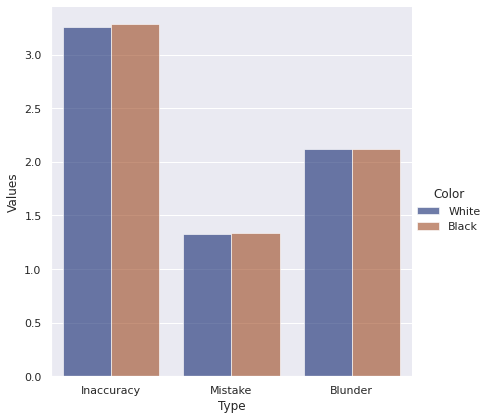

In [ ]:
g2 = sns.catplot(
    data=misplays, kind="bar",
    x="Type", y="Values", hue="Color",
    palette="dark", alpha=.6, height=6
)

#difference is negligible